In [2]:
import string
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional, RepeatVector, TimeDistributed
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 200)

In [3]:
# function to read raw text file
def read_text(filename):
    file = open(filename, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    return text

In [4]:
# split a text into sentences
def to_lines(text):
    sents = text.strip().split('\n')
    sents = [i.split('\t') for i in sents]
    return sents

In [5]:
data = read_text('deu.txt')
deu_eng = to_lines(data)
deu_eng = array(deu_eng)
deu_eng = deu_eng[:50000, :]

In [6]:
# Text preprocessing
# text cleaning
print('Original German text')
print(deu_eng)

Original German text
[['Go.' 'Geh.'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)']
 ['Hi.' 'Hallo!'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)']
 ['Hi.' 'Grüß Gott!'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)']
 ...
 ["I'm giving up smoking." 'Ich höre mit dem Rauchen auf.'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #256952 (minshirui) & #407184 (MUIRIEL)']
 ["I'm glad I was nearby." 'Ich bin froh, dass ich in der Nähe war.'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2547219 (CK) & #3448316 (Pfirsichbaeumchen)']
 ["I'm glad Tom has gone." 'Ich bin froh, dass Tom weg ist.'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2547217 (CK) & #5299642 (Pfirsichbaeumchen)']]


In [13]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
# remove punctuation
deu_eng[:, 0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:, 0]]
deu_eng[:, 1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:, 1]]
print('After removing punctuation')
print(deu_eng)

After removing punctuation
[['Go' 'Geh'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)']
 ['Hi' 'Hallo'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)']
 ['Hi' 'Grüß Gott'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)']
 ...
 ['Im giving up smoking' 'Ich höre mit dem Rauchen auf'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #256952 (minshirui) & #407184 (MUIRIEL)']
 ['Im glad I was nearby' 'Ich bin froh dass ich in der Nähe war'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2547219 (CK) & #3448316 (Pfirsichbaeumchen)']
 ['Im glad Tom has gone' 'Ich bin froh dass Tom weg ist'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2547217 (CK) & #5299642 (Pfirsichbaeumchen)']]


In [23]:
# convert text to lowercase
for i in range(len(deu_eng)):
    deu_eng[i, 0] = deu_eng[i, 0].lower()
    deu_eng[i, 1] = deu_eng[i, 1].lower()
print('Lower case conversion')
print(deu_eng)

Lower case conversion
[['go' 'geh'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)']
 ['hi' 'hallo'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)']
 ['hi' 'grüß gott'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)']
 ...
 ['im giving up smoking' 'ich höre mit dem rauchen auf'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #256952 (minshirui) & #407184 (MUIRIEL)']
 ['im glad i was nearby' 'ich bin froh dass ich in der nähe war'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2547219 (CK) & #3448316 (Pfirsichbaeumchen)']
 ['im glad tom has gone' 'ich bin froh dass tom weg ist'
  'CC-BY 2.0 (France) Attribution: tatoeba.org #2547217 (CK) & #5299642 (Pfirsichbaeumchen)']]


In [24]:
# text to sequence conversion
# empty lists
eng_l = []
deu_l = []

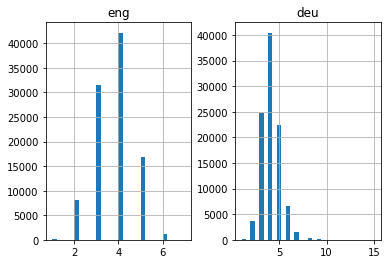

In [26]:
# populate the lists with sentence lengths
for i in deu_eng[:, 0]:
      eng_l.append(len(i.split()))

for i in deu_eng[:, 1]:
      deu_l.append(len(i.split()))
        
length_df = pd.DataFrame({'eng': eng_l, 'deu': deu_l})
length_df.hist(bins=30)
plt.show()

In [27]:
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [28]:
# prepare english tokenizer
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 6256


In [29]:
# prepare Deutch tokenizer
deu_tokenizer = tokenization(deu_eng[:, 1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 10329


In [30]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    # integer encode sequences
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [31]:
# Model building
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(deu_eng, test_size=0.2, random_state=12)

In [32]:
# prepare training data
trainX = encode_sequences(deu_tokenizer, deu_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(deu_tokenizer, deu_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

### Model Architecture
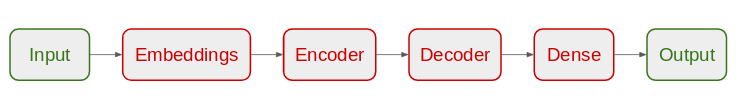

In [33]:
# build NMT model
def define_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [35]:
# model compilation
model = define_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [36]:
filename = 'deu-eng_model.h1'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), epochs=30, batch_size=512, validation_split=0.2, callbacks=[checkpoint], verbose=1)

Epoch 1/30
63/63 [==============================] - 193s 3s/step - loss: 4.3500 - val_loss: 2.8478

Epoch 00001: val_loss improved from inf to 2.84781, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 2/30
63/63 [==============================] - 170s 3s/step - loss: 2.7904 - val_loss: 2.7281

Epoch 00002: val_loss improved from 2.84781 to 2.72808, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 3/30
63/63 [==============================] - 179s 3s/step - loss: 2.6424 - val_loss: 2.5649

Epoch 00003: val_loss improved from 2.72808 to 2.56490, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 4/30
63/63 [==============================] - 179s 3s/step - loss: 2.4312 - val_loss: 2.4212

Epoch 00004: val_loss improved from 2.56490 to 2.42120, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 5/30
63/63 [==============================] - 187s 3s/step - loss: 2.2874 - val_loss: 2.3043

Epoch 00005: val_loss improved from 2.42120 to 2.30427, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 6/30
63/63 [==============================] - 188s 3s/step - loss: 2.1478 - val_loss: 2.2058

Epoch 00006: val_loss improved from 2.30427 to 2.20576, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 7/30
63/63 [==============================] - 186s 3s/step - loss: 2.0272 - val_loss: 2.1501

Epoch 00007: val_loss improved from 2.20576 to 2.15011, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 8/30
63/63 [==============================] - 174s 3s/step - loss: 1.9153 - val_loss: 2.0682

Epoch 00008: val_loss improved from 2.15011 to 2.06818, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 9/30
63/63 [==============================] - 174s 3s/step - loss: 1.8243 - val_loss: 1.9868

Epoch 00009: val_loss improved from 2.06818 to 1.98680, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 10/30
63/63 [==============================] - 177s 3s/step - loss: 1.7262 - val_loss: 1.9214

Epoch 00010: val_loss improved from 1.98680 to 1.92143, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 11/30
63/63 [==============================] - 187s 3s/step - loss: 1.6354 - val_loss: 1.8592

Epoch 00011: val_loss improved from 1.92143 to 1.85919, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 12/30
63/63 [==============================] - 167s 3s/step - loss: 1.5372 - val_loss: 1.7912

Epoch 00012: val_loss improved from 1.85919 to 1.79116, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 13/30
63/63 [==============================] - 132s 2s/step - loss: 1.4429 - val_loss: 1.7490

Epoch 00013: val_loss improved from 1.79116 to 1.74900, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 14/30
63/63 [==============================] - 129s 2s/step - loss: 1.3529 - val_loss: 1.6812

Epoch 00014: val_loss improved from 1.74900 to 1.68123, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 15/30
63/63 [==============================] - 132s 2s/step - loss: 1.2752 - val_loss: 1.6513

Epoch 00015: val_loss improved from 1.68123 to 1.65125, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 16/30
63/63 [==============================] - 136s 2s/step - loss: 1.1931 - val_loss: 1.5955

Epoch 00016: val_loss improved from 1.65125 to 1.59548, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 17/30
63/63 [==============================] - 137s 2s/step - loss: 1.1170 - val_loss: 1.5777

Epoch 00017: val_loss improved from 1.59548 to 1.57769, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 18/30
63/63 [==============================] - 141s 2s/step - loss: 1.0387 - val_loss: 1.5315

Epoch 00018: val_loss improved from 1.57769 to 1.53150, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 19/30
63/63 [==============================] - 149s 2s/step - loss: 0.9700 - val_loss: 1.4953

Epoch 00019: val_loss improved from 1.53150 to 1.49532, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 20/30
63/63 [==============================] - 148s 2s/step - loss: 0.9054 - val_loss: 1.4663

Epoch 00020: val_loss improved from 1.49532 to 1.46626, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 21/30
63/63 [==============================] - 152s 2s/step - loss: 0.8394 - val_loss: 1.4434

Epoch 00021: val_loss improved from 1.46626 to 1.44341, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 22/30
63/63 [==============================] - 151s 2s/step - loss: 0.7761 - val_loss: 1.4132

Epoch 00022: val_loss improved from 1.44341 to 1.41319, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 23/30
63/63 [==============================] - 153s 2s/step - loss: 0.7197 - val_loss: 1.3871

Epoch 00023: val_loss improved from 1.41319 to 1.38711, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 24/30
63/63 [==============================] - 147s 2s/step - loss: 0.6659 - val_loss: 1.3769

Epoch 00024: val_loss improved from 1.38711 to 1.37694, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 25/30
63/63 [==============================] - 164s 3s/step - loss: 0.6181 - val_loss: 1.3568

Epoch 00025: val_loss improved from 1.37694 to 1.35680, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 26/30
63/63 [==============================] - 150s 2s/step - loss: 0.5742 - val_loss: 1.3434

Epoch 00026: val_loss improved from 1.35680 to 1.34343, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 27/30
63/63 [==============================] - 145s 2s/step - loss: 0.5252 - val_loss: 1.3382

Epoch 00027: val_loss improved from 1.34343 to 1.33815, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 28/30
63/63 [==============================] - 146s 2s/step - loss: 0.4801 - val_loss: 1.3386

Epoch 00028: val_loss did not improve from 1.33815
Epoch 29/30
63/63 [==============================] - 145s 2s/step - loss: 0.4434 - val_loss: 1.3235

Epoch 00029: val_loss improved from 1.33815 to 1.32351, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


Epoch 30/30
63/63 [==============================] - 144s 2s/step - loss: 0.4027 - val_loss: 1.3172

Epoch 00030: val_loss improved from 1.32351 to 1.31721, saving model to deu-eng_model.h1


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


INFO:tensorflow:Assets written to: deu-eng_model.h1\assets


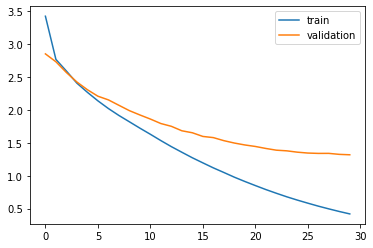

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.show()

In [38]:
model = load_model('deu-eng_model.h1')
preds = model.predict_classes(testX.reshape((testX.shape[0], testX.shape[1])))

C:\Users\REEHA\anaconda3\envs\ibm\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
# These predictions are sequences of integers. We need to convert these integers to their corresponding words.
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [40]:
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], eng_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 
    preds_text.append(' '.join(temp))

In [42]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})
#pd.set_option('display.max_colwidth', 200)
print(pred_df.sample(15))

                     actual                 predicted
5101   everybody trusts tom  everyone trusts tom     
7657  i met her by accident     i met her for week   
3959        its copyrighted         thats is for     
4541           this is ugly   this is disgusting     
3259        tom was evasive   tom was distracted     
1504         who removed it      who removed you     
9067         she kissed him       she kissed him     
8739      wheres tom hiding        where is from     
9030   i found him the book          i was it the    
5815       tom ran upstairs     tom ran upstairs     
2918      tom respects mary       tom lived mary     
8589        i can drive you       i can drive you    
9443    you may come in now     you may enter now    
2467    hows your boy doing          how is your     
8566      i hope this works      i hope this work    
